In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


LSTM(Long Short Trem Memory)  

LSTM은 gradient vanishing(기울기 소실, 경사 사라짐) 또는 gradient exploding(기울기 폭주, 기울기가 사라짐)과 같은 기존 RNN의 단점을 극복하고자 만들어진 조금 더 진화된 RNN 셀로 LSTM 셀 내부를 살펴보면 기존 RNN의 단점을 극복하기 위해 이전 정보를 지우거나 기억하기 위한 로직과 현재 정보를 기억하기 위한 로직이 구현되어 있다. 아래 그림을 보면 기존 RNN에서 보지 못했던 주황색 선과 조금 더 많아진 활성화 함수와 수학 기호들을 볼 수 있다.
***
주황색 선은 메모리 셀이라고 부르고 주황색 선상의 곱하기 기호에서 0부터 1까지의 값인 시그모이드 출력값이 곱해지게 되어 메모리 셀의 기존 정보를 어느정도까지 기억할지 결정하게 된다. 주황색 선상의 더하기 기호는 새로운 정보를 메모리셀에 기존 정보에 더하는 로직이 그리고 h<sub>t</sub> 선상의 곱하기 기호에서 메모리셀의 정보와 현재 정보가 함께 계산되어 상태값을 출력하는 것을 확인할 수 있다.

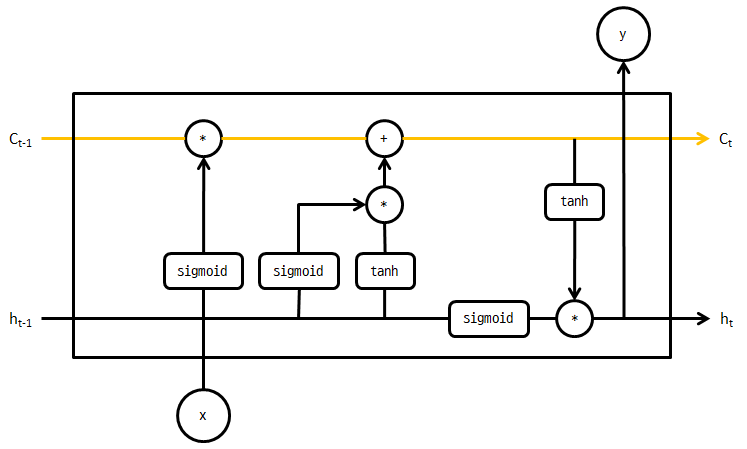

In [3]:
from IPython.display import Image
Image('lstm.png', width='800')

텐서플로우에는 이미 LSTM이 구현되어 있기 때문에 위 그림을 직접 구현할 필요는 없고 아래 그림만 이해해도 사용에 큰 무리가 없다.

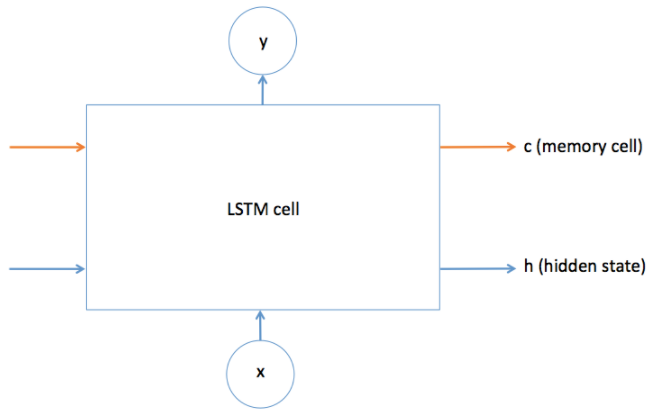

In [4]:
Image('lstm2.png', width='700')

In [10]:
inputs = np.array([[[1, 0]]])
print(inputs.shape)

(1, 1, 2)


In [14]:
tf.reset_default_graph()
tf.set_random_seed(35)

tf_inputs = tf.constant(inputs, dtype=tf.float32)
# LSTM 셀을 만든다.
lstm_cell = tf.nn.rnn_cell.LSTMCell(num_units=1)
outputs, state = tf.nn.dynamic_rnn(cell=lstm_cell, dtype=tf.float32, inputs=tf_inputs)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    _output, _state = sess.run([outputs, state])
    print('LSTM 출력(output) 값: {}'.format(_output))
    print('LSTM 메모리 셀(memory cell) 값: {}'.format(_state.c))
    print('LSTM 상태(hidden state) 값: {}'.format(_state.h))

LSTM 출력(output) 값: [[[0.08987644]]]
LSTM 메모리 셀(memory cell) 값: [[0.19834825]]
LSTM 상태(hidden state) 값: [[0.08987644]]
